# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets._samples_generator import make_blobs, make_circles
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, classification_report
import scipy
import warnings
warnings.filterwarnings('ignore')

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

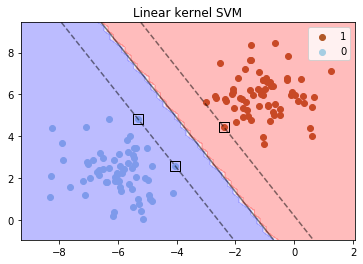

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

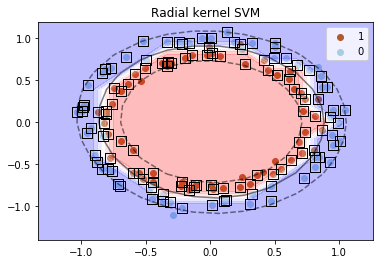

In [6]:
# build the model
model = svm.SVC(kernel='rbf', gamma=0.5, random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 0.3, X_train.iloc[:, 0].max() + 0.3
x2_min, x2_max = X_train.iloc[:, 1].min() - 0.3, X_train.iloc[:, 1].max() + 0.3

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Radial kernel SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

A RBF kernel should be used when the data is linearly non-separable. That is if the dataset is non-linear or the potential boundary to separate the different classes is not a straight line.

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

SVM works by maximizing the distance between support vectors and a separating plane. In the case that the features are not scaled, features with large values will dominate features with low values when computing the distance. Therefore, feature-scaling ensures that all features influence the distance metric to the same extent. 

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [7]:
# Define X (features) and y (target)
X = gene_expression
y = drug_response


# Based on the z-score being lower or higher than 0 the drug_response is either classified 
# as sensitive (label 0) or resistant (label 1) respectively
# The target labels (0) or (1) are computed by calculating these z-scores over the whole dataset
# Because we want to predict those labels that are normalized in that way

drug_response = scipy.stats.zscore(drug_response).ravel()
y_class = (drug_response > 0).astype(int)

# We split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=42)

# We scale the variables in the training dataset and perform this same transformation on the test set
# As mentioned earlier, scaling the features is very important when using a kernel function
# We do it separately for training and test set to avoid contamination of the train set with information of the test set

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Define the model
model = svm.SVC()

# For SVM, five hyperparameters are the most important to be tuned:
# the regularization strength (C), the kernel type (e.g. linear, RBF, sigmoid etc.) and the kernel coefficient for rbf, 
# sigmoid and poly (Gamma)
# We can also try different values for the degree of the polynomial kernel and the coefficient (= independent term for the
# poly and sigmoid kernels)

# We define the parameter grids for these three hyperparameters

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid'], 'degree':[1,2,3,4], 'coef0':np.logspace(-1,1,4)}

# We perform the grid search
gscv = GridSearchCV(model,param_grid,refit=True)
gscv.fit(X_train,y_train)

print(gscv.best_estimator_)

# We predict on the independent test set and calculate model performance

gscv_pred = gscv.predict(X_test)

# Precision = tp / (tp+fp)
tp = sum(gscv_pred * y_test)
fp = np.sum(np.logical_and(gscv_pred == 1, y_test == 0))
precision = tp / (tp+fp)

# Print classification report and calculated precision score

print(classification_report(y_test,gscv_pred))
print('Calculated precision is ' + str(precision))

# Evaluate best parameters
best_kernel = gscv.best_params_['kernel']
best_degree = gscv.best_params_['degree']
best_gamma = gscv.best_params_['gamma']
best_C = gscv.best_params_['C']
best_coef0 = gscv.best_params_['coef0']
print("Optimal kernel: {}".format(best_kernel))
print("Optimal degree: {}".format(best_degree))
print("Optimal gamma: {}".format(best_gamma))
print("Optimal C: {}".format(best_C))
print("Optimal coef0: {}".format(best_coef0))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.46415888336127786, decision_function_shape='ovr', degree=1,
    gamma=0.01, kernel='sigmoid', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.64      0.56      0.60        16

    accuracy                           0.68        37
   macro avg       0.67      0.66      0.66        37
weighted avg       0.67      0.68      0.67        37

Calculated precision is 0.6428571428571429
Optimal kernel: sigmoid
Optimal degree: 1
Optimal gamma: 0.01
Optimal C: 1
Optimal coef0: 0.46415888336127786


<p><font color='#770a0a'>The calculated precision of approximately 0.64 corresponds to the precision in the classification report of label 1. The precision in the classification report correponding to label 0 equals 0.70. The number of test samples with true label 1 is lower (16) compared to test samples with label 0 (21). Hence the samples that have class 0 are a bit overrepresented in the test set. For the label 1 (second row in classification report) the true positives are all samples that are predicted as resistant (=1) that actually are resistant in the test set. The false positives are all samples that are predicted as label resistant when in fact they are sensitive (= 0) in the test set. For the first row in the classification report (precision for label 0) this is the other way around, but we see 'precision' here with respect to label 1.

The optimal degree equals 1, but this parameter is not relevant for this final model as a sigmoid kernel was chosen as optimal kernel and not the poly kernel. For C the value 1 is chosen which corresponds to the 'default' value of C in the SVM. The value of C is inversely proportional to the strength of the regularization which in this case is the L2 norm. Hence we have a somewhat high regularization in our final model.
    
Finally, for gamma coefficient for the sigmoid kernel and coef0, the independent term in the sigmoid kernel, the values 0.01 and 0.46 were chosen respectively by GridSearch. 
    


</font></p>


## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

In [11]:
model_rf = RandomForestClassifier(bootstrap=True, oob_score=True)

n_estimators = [50, 100, 150, 200, 1000]
depths = np.linspace(3, 19, 5)
features = ['sqrt', 'log2']
criterions = ['gini', 'entropy']
parms = {'n_estimators': n_estimators, 
         'max_depth': depths, 
         'max_features': features,
         'criterion': criterions
         }

# Perform grid search of polynomial order
gscv = GridSearchCV(model_rf, parms, refit=True)
gscv.fit(X_train,y_train)

# We find our best model

best_model = gscv.best_estimator_
print(best_model)

# We predict on the test set and calculate model performance

gscv_pred = gscv.predict(X_test)

# Precision = tp / (tp+fp)
tp = sum(gscv_pred * y_test)
fp = np.sum(np.logical_and(gscv_pred == 1, y_test == 0))
precision = tp / (tp+fp)

# Print confusion matrix, classification report and calculated precision score

report = classification_report(y_test, gscv_pred)
print("Classification report:\n",report)

# Get best value of alpha
best_n_est = gscv.best_params_['n_estimators']
best_depth = gscv.best_params_['max_depth']
best_feature = gscv.best_params_['max_features']
best_criterion = gscv.best_params_['criterion']
print("Optimal # estimators: {}".format(best_n_est))
print("Optimal max depths: {}".format(best_depth))
print("Optimal criterion: {}".format(best_criterion))
print("Optimal features: {}".format(best_feature))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11.0, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.66      0.90      0.76        21
           1       0.75      0.38      0.50        16

    accuracy                           0.68        37
   macro avg       0.70      0.64      0.63        37
weighted avg       0.70      0.68      0.65        37

Precision: 0.75

Classification report:
               precision    recall  f1-score   support

           0       0.66      

<p><font color='#770a0a'>
First of all, the hyper-parameters selected by the GridSearch are 50 trees in the random forest and the maximum depth is 11. The maximum number of features considered per split in an individual tree is the log2 of the total number of features in the dataset. 
    
The SVM and RF model have a precision of respectively 0.64 and 0.75 for label 1. The precision for label 0, SVM (0.70) has a better perfomance than the RF model (0.66). There is no model that definitely outperforms the other one, as from the f1-scores no conclusion can be drawn as well (0.73 and 0.60 for SVM vs. 0.76 and 0.50 for random forest). This might be caused by the test dataset being rather small and the asymmetrical distribution of the labels in the independent test set (label 0 is overrepresented). 
</font></p>



The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

Text(0, 0.5, 'Relative importance')

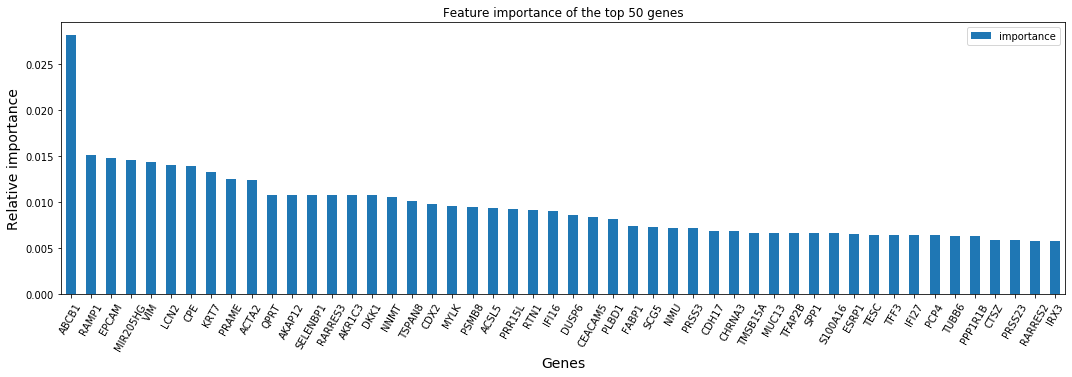

In [14]:
feature_importances = pd.DataFrame(best_model.feature_importances_, index = X.columns,  columns=['importance']).sort_values('importance', ascending=False)

ax = feature_importances.iloc[0:50].plot.bar(figsize=(18,5), rot=60, title='Feature importance of the top 50 genes')
ax.set_xlabel("Genes", fontsize=14)
ax.set_ylabel("Relative importance", fontsize=14)

<p><font color='#770a0a'>As can be seen in the figure above, feature ABCB1 is most important with relative importance of 0.03. It is twice as important as the second feature RAMP1 with relative importance 0.015. However, we must note that the relative importance of approximately 0.03 for ABCB1 is on itself not spectacularly high. After the first two features the relative importance does not change as much from feature to feature. The features are sorted based on their importance. Therefore we can see that roughly the top 10 features are twice as important as the last 10 features.</font></p>

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>
### Campbell et al. (2020) Pharmacologically informed machine learning approach for identifying pathological states of unconsciousness via resting-state fMRI. 

The goal of this paper was to evaluate whether three different machine learning models are able to make a binary distinction between conscious wakefulness and anesthetic-induced unconsciousness. Furthermore the ability to identify pathologically induced unconsciousness based on this binary distinction was investigated.

One type of machine learning model used in this paper is Extra Trees (ET) which is a variant of Random Forest. This model introduces additional randomness regarding the decision of split-points.

This model was used as it is popular and is successful in multi-variate neuroimaging applications. The inherent nature of Random Forests, in which predictions are aggregated with bagging, helps to minimize model variance and overfitting. Furthermore, ET offers good computational efficiency, compared to for example a deep learning model, it is easy to construct and has general reliability. Furthermore decision-tree based models, in general have to ability to perform analysis of feature importance. This has the added advantage to help to inform feature selection for future studies.